In [1]:
# importing libraries and file.

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium

In [2]:
# dataset download link: https://opendata.maryland.gov/widgets/65du-s3qu

#import the dataset.
df = pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv')
df

C:\Users\priya\AppData\Local\Temp\ipykernel_15472\271665351.py:4: DtypeWarning: Columns (34,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv')


,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2022,Q2,Dark Lights On,3.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.992210,-77.097021,POINT (-77.097020666667 38.9922095)
2,2020,Q4,NaN,6.02,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.323620,-76.503080,POINT (-76.503080116667 39.323620083333)
3,2022,Q1,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.411213,-76.628028,POINT (-76.628028425147 39.411213105087)
4,2022,Q2,Dark Lights On,3.00,Queen Anne's,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.974880,-76.281090,POINT (-76.28109 38.97488)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822407,2019,Q3,Daylight,1.00,Charles,8.0,NaN,0.0,Not Applicable,0.0,...,NaN,M,N,0.0,UU,NaN,STRUC #CHZ301 POTOMAC RIVER,38.363845,-76.980606,POINT (-76.98060605635531 38.363845415321)
822408,2019,Q3,Daylight,1.00,Montgomery,15.0,NaN,63.0,Intersection,2.0,...,NaN,F,N,182.0,MU,NaN,LAKE FOREST BLVD,39.151418,-77.207443,POINT (-77.2074433333333 39.1514183333333)
822409,2016,Q2,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.0,...,NaN,M,S,8746.0,CO,NaN,MORNING WALK DR,39.259988,-76.757913,POINT (-76.7579126358032 39.2599878865495)
822410,2018,Q4,Daylight,1.00,Baltimore,3.0,NaN,0.0,Non Intersection,1.0,...,NaN,F,S,70.0,IS,NaN,NO NAME,39.298405,-76.742785,POINT (-76.742785 39.298405)


In [3]:
df.shape   #To find the count of rows and columns in the df

(822412, 56)

In [4]:
#column names of the dataset
df.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_DESC', 'LANE_CODE', 'RD_COND_DESC',
       'RD_COND_CODE', 'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC',
       'FIX_OBJ_CODE', 'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC',
       'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC',
       'SIGNAL_FLAG', 'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE',
       'HARM_EVENT_DESC1', 'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2',
       'HARM_EVENT_CODE2', 'RTE_NO', 'ROUTE_TYPE_CODE', 'RTE_SUFFIX',
       'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG',
       'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC', 'FEET_MILES_FLAG',
       'DISTANCE_DIR_FLAG', 'REFERENCE_NO', 'REFERENCE_TYPE_CODE',
       'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME', 'LATITUDE', 'LONGITUDE',
       'L

In [5]:
df.describe()

,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,...,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE
count,822412.000000,822412.000000,822400.000000,0.0,615156.000000,740748.000000,822412.000000,740748.000000,624978.000000,740748.000000,...,822412.000000,8.224120e+05,822412.000000,822412.000000,657905.000000,737251.000000,722212.000000,650694.000000,822412.000000,822412.000000
mean,2018.173174,3.929687,12.765743,NaN,104.014808,2.656592,21.284513,2.655637,1.486628,1.784773,...,6.271272,2.018240e+07,3.951121,2.133855,969.756635,4.819127,63.964048,1283.030775,39.145343,-76.745110
std,2.154622,13.480515,7.868420,NaN,289.778404,9.998283,29.848388,9.156134,0.804025,8.572648,...,10.253379,2.151408e+04,8.579073,7.537980,1631.678072,9.324763,141.722727,1921.712137,0.310528,0.467689
min,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.015010e+07,0.000000,0.000000,-121.000000,0.000000,0.000000,-200.000000,37.000000,-79.996100
25%,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,6.010000,2.016102e+07,1.000000,0.000000,90.000000,0.230000,0.000000,60.000000,38.982235,-76.940303
50%,2018.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,1.000000,...,6.010000,2.018082e+07,1.000000,0.000000,258.000000,1.650000,0.500000,356.000000,39.226267,-76.709360
75%,2020.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,1.000000,...,6.010000,2.020071e+07,3.000000,1.000000,920.000000,6.460000,50.000000,1668.000000,39.346210,-76.574555
max,2022.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,99.000000,...,99.000000,2.022063e+07,99.000000,99.000000,9922.000000,5100.000000,1000.000000,9921.000000,39.994802,-75.000000


In [6]:
#checking the null values count for each column
df.isnull().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                33235
LIGHT_CODE                    0
COUNTY_DESC                  12
COUNTY_NO                    12
MUNI_DESC                822412
MUNI_CODE                207256
JUNCTION_DESC            110305
JUNCTION_CODE             81664
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            84017
SURF_COND_CODE            81664
LANE_DESC                197442
LANE_CODE                197434
RD_COND_DESC              81664
RD_COND_CODE              81664
RD_DIV_DESC               86039
RD_DIV_CODE               81664
FIX_OBJ_DESC              44101
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             385710
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 444232
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE

In [7]:
#To find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822412 entries, 0 to 822411
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   822412 non-null  int64  
 1   QUARTER                822412 non-null  object 
 2   LIGHT_DESC             789177 non-null  object 
 3   LIGHT_CODE             822412 non-null  float64
 4   COUNTY_DESC            822400 non-null  object 
 5   COUNTY_NO              822400 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              615156 non-null  float64
 8   JUNCTION_DESC          712107 non-null  object 
 9   JUNCTION_CODE          740748 non-null  float64
 10  COLLISION_TYPE_DESC    822412 non-null  object 
 11  COLLISION_TYPE_CODE    822412 non-null  int64  
 12  SURF_COND_DESC         738395 non-null  object 
 13  SURF_COND_CODE         740748 non-null  float64
 14  LANE_DESC              624970 non-nu

In [8]:
# dropping the columns which have more null values. these 3 columns have almost more than 90% nulls.
df.drop(['MUNI_DESC','RTE_SUFFIX','REFERENCE_SUFFIX'],axis='columns',inplace=True)

In [9]:
#checking the duplicates in df
dup = df[df.duplicated()]
dup

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,...,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION


In [10]:
#the MUNI_CODE which is numerical representation of MUNI_DESC.Hence dropping it from the df.
df.drop(['MUNI_CODE'],axis='columns',inplace=True)

In [11]:
df.shape

(822412, 52)

In [12]:
#dropping the columns which don't have predictive power 
df.drop(['AREA_CODE','MAINROAD_NAME','REFERENCE_ROAD_NAME','LOCATION',
                           'REPORT_NO','LOC_CODE','REFERENCE_TYPE_CODE','AGENCY_CODE','FEET_MILES_FLAG','SIGNAL_FLAG','LOGMILE_DIR_FLAG','ROUTE_TYPE_CODE'], axis = 'columns',inplace=True)

In [13]:
df.shape

(822412, 40)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822412 entries, 0 to 822411
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   822412 non-null  int64  
 1   QUARTER                822412 non-null  object 
 2   LIGHT_DESC             789177 non-null  object 
 3   LIGHT_CODE             822412 non-null  float64
 4   COUNTY_DESC            822400 non-null  object 
 5   COUNTY_NO              822400 non-null  float64
 6   JUNCTION_DESC          712107 non-null  object 
 7   JUNCTION_CODE          740748 non-null  float64
 8   COLLISION_TYPE_DESC    822412 non-null  object 
 9   COLLISION_TYPE_CODE    822412 non-null  int64  
 10  SURF_COND_DESC         738395 non-null  object 
 11  SURF_COND_CODE         740748 non-null  float64
 12  LANE_DESC              624970 non-null  object 
 13  LANE_CODE              624978 non-null  float64
 14  RD_COND_DESC           740748 non-nu

In [15]:
#There are few columns that numerically correspond identically to other columns. So, i am removing those columns.
df.drop(['LIGHT_CODE','COUNTY_NO','JUNCTION_CODE','COLLISION_TYPE_CODE','SURF_COND_CODE','LANE_CODE','RD_COND_CODE','RD_DIV_CODE','FIX_OBJ_CODE','WEATHER_CODE','HARM_EVENT_CODE1','HARM_EVENT_CODE2'], 
                          axis = 'columns',
                         inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822412 entries, 0 to 822411
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   822412 non-null  int64  
 1   QUARTER                822412 non-null  object 
 2   LIGHT_DESC             789177 non-null  object 
 3   COUNTY_DESC            822400 non-null  object 
 4   JUNCTION_DESC          712107 non-null  object 
 5   COLLISION_TYPE_DESC    822412 non-null  object 
 6   SURF_COND_DESC         738395 non-null  object 
 7   LANE_DESC              624970 non-null  object 
 8   RD_COND_DESC           740748 non-null  object 
 9   RD_DIV_DESC            736373 non-null  object 
 10  FIX_OBJ_DESC           778311 non-null  object 
 11  REPORT_TYPE            711679 non-null  object 
 12  WEATHER_DESC           436702 non-null  object 
 13  ACC_DATE               822412 non-null  int64  
 14  ACC_TIME               822412 non-nu

In [17]:
# there are few nulls in the some of the columns I will handle this nulls when I create the pipelines for ml models. 

#  TARGET VARIABLE

In [18]:
#  Target variable is REPORT TYPE. Property Damage Crash, Injury Crash, and Fatal Crash are all various classes that are included in the target variable. Injury crash and fatal crash are nearly identical. 

In [19]:
#dropping all the null values in target variable 
df = df.dropna(subset = ['REPORT_TYPE'])

In [20]:
#replacing the class in target varaible 
df['REPORT_TYPE'] = df['REPORT_TYPE'].replace({'Fatal Crash':'Injury Crash'})

C:\Users\priya\AppData\Local\Temp\ipykernel_15472\549826269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REPORT_TYPE'] = df['REPORT_TYPE'].replace({'Fatal Crash':'Injury Crash'})


In [21]:
df.REPORT_TYPE.value_counts() # value count for target variable

Property Damage Crash    509539
Injury Crash             202140
Name: REPORT_TYPE, dtype: int64

<AxesSubplot:>

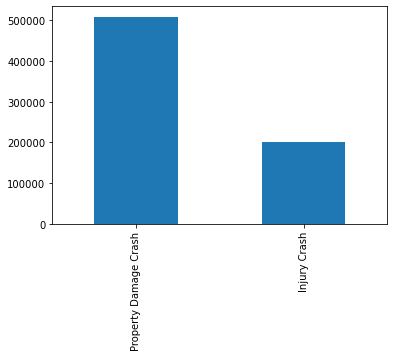

In [22]:
df['REPORT_TYPE'].value_counts().plot.bar() # bar plot for target variable

# Plots that show the distribution of the data

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'ACC_DATE'}>,
        <AxesSubplot:title={'center':'RTE_NO'}>],
       [<AxesSubplot:title={'center':'LOG_MILE'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'REFERENCE_NO'}>],
       [<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>, <AxesSubplot:>]],
      dtype=object)

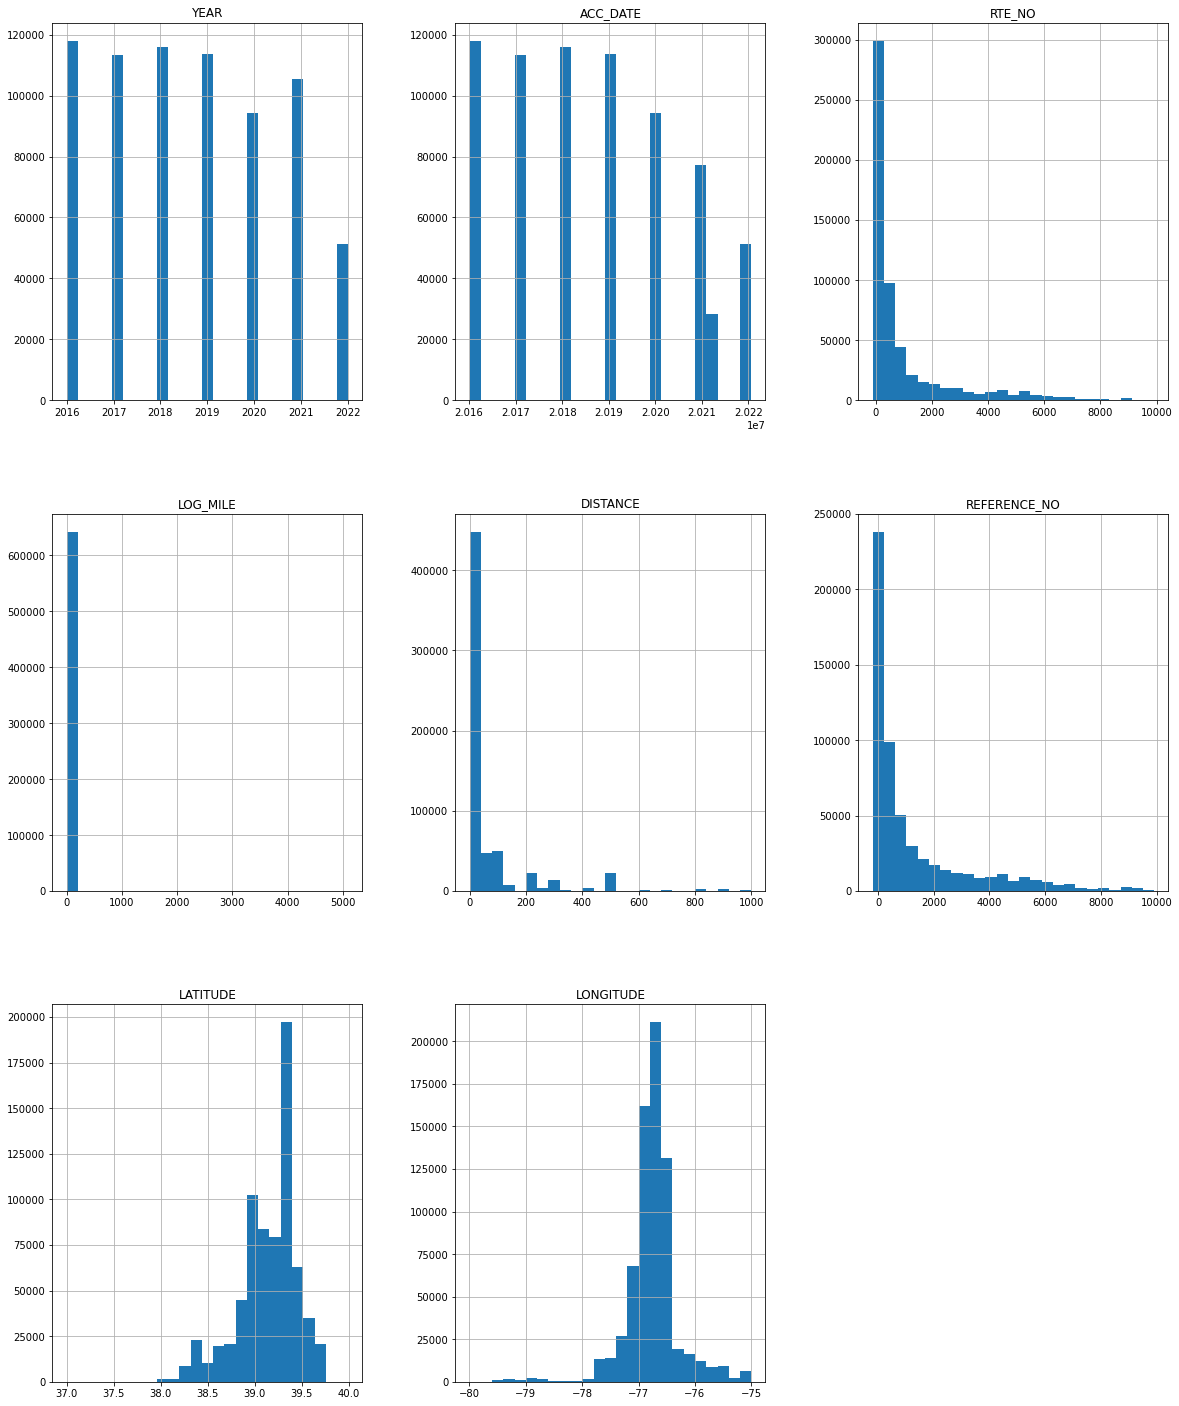

In [23]:
df.hist(bins = 25,figsize = (20,25))

# plotting bar graph for Countywide vehicle crashes

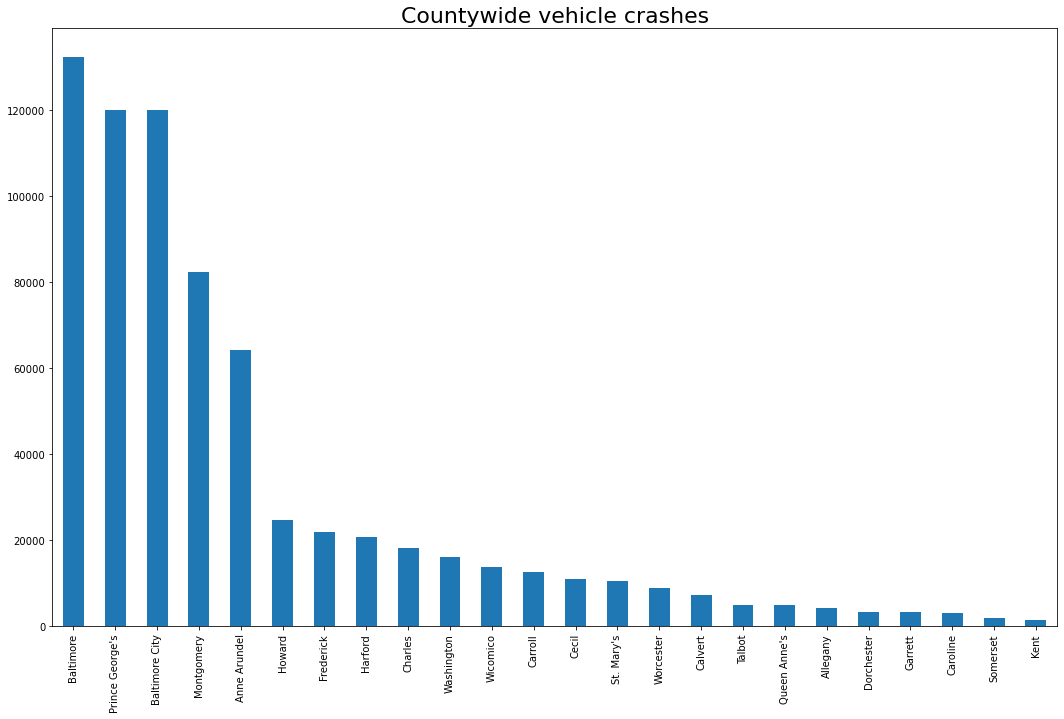

In [24]:
plt.rcParams['figure.figsize'] = (25, 10)
df['COUNTY_DESC'].value_counts().plot.bar( figsize = (18, 11))
plt.title('Countywide vehicle crashes', fontweight = 25, fontsize = 22)
plt.show()

In the above bar graph we can clearly see that in Baltimore county there are more than 120000 crashes.

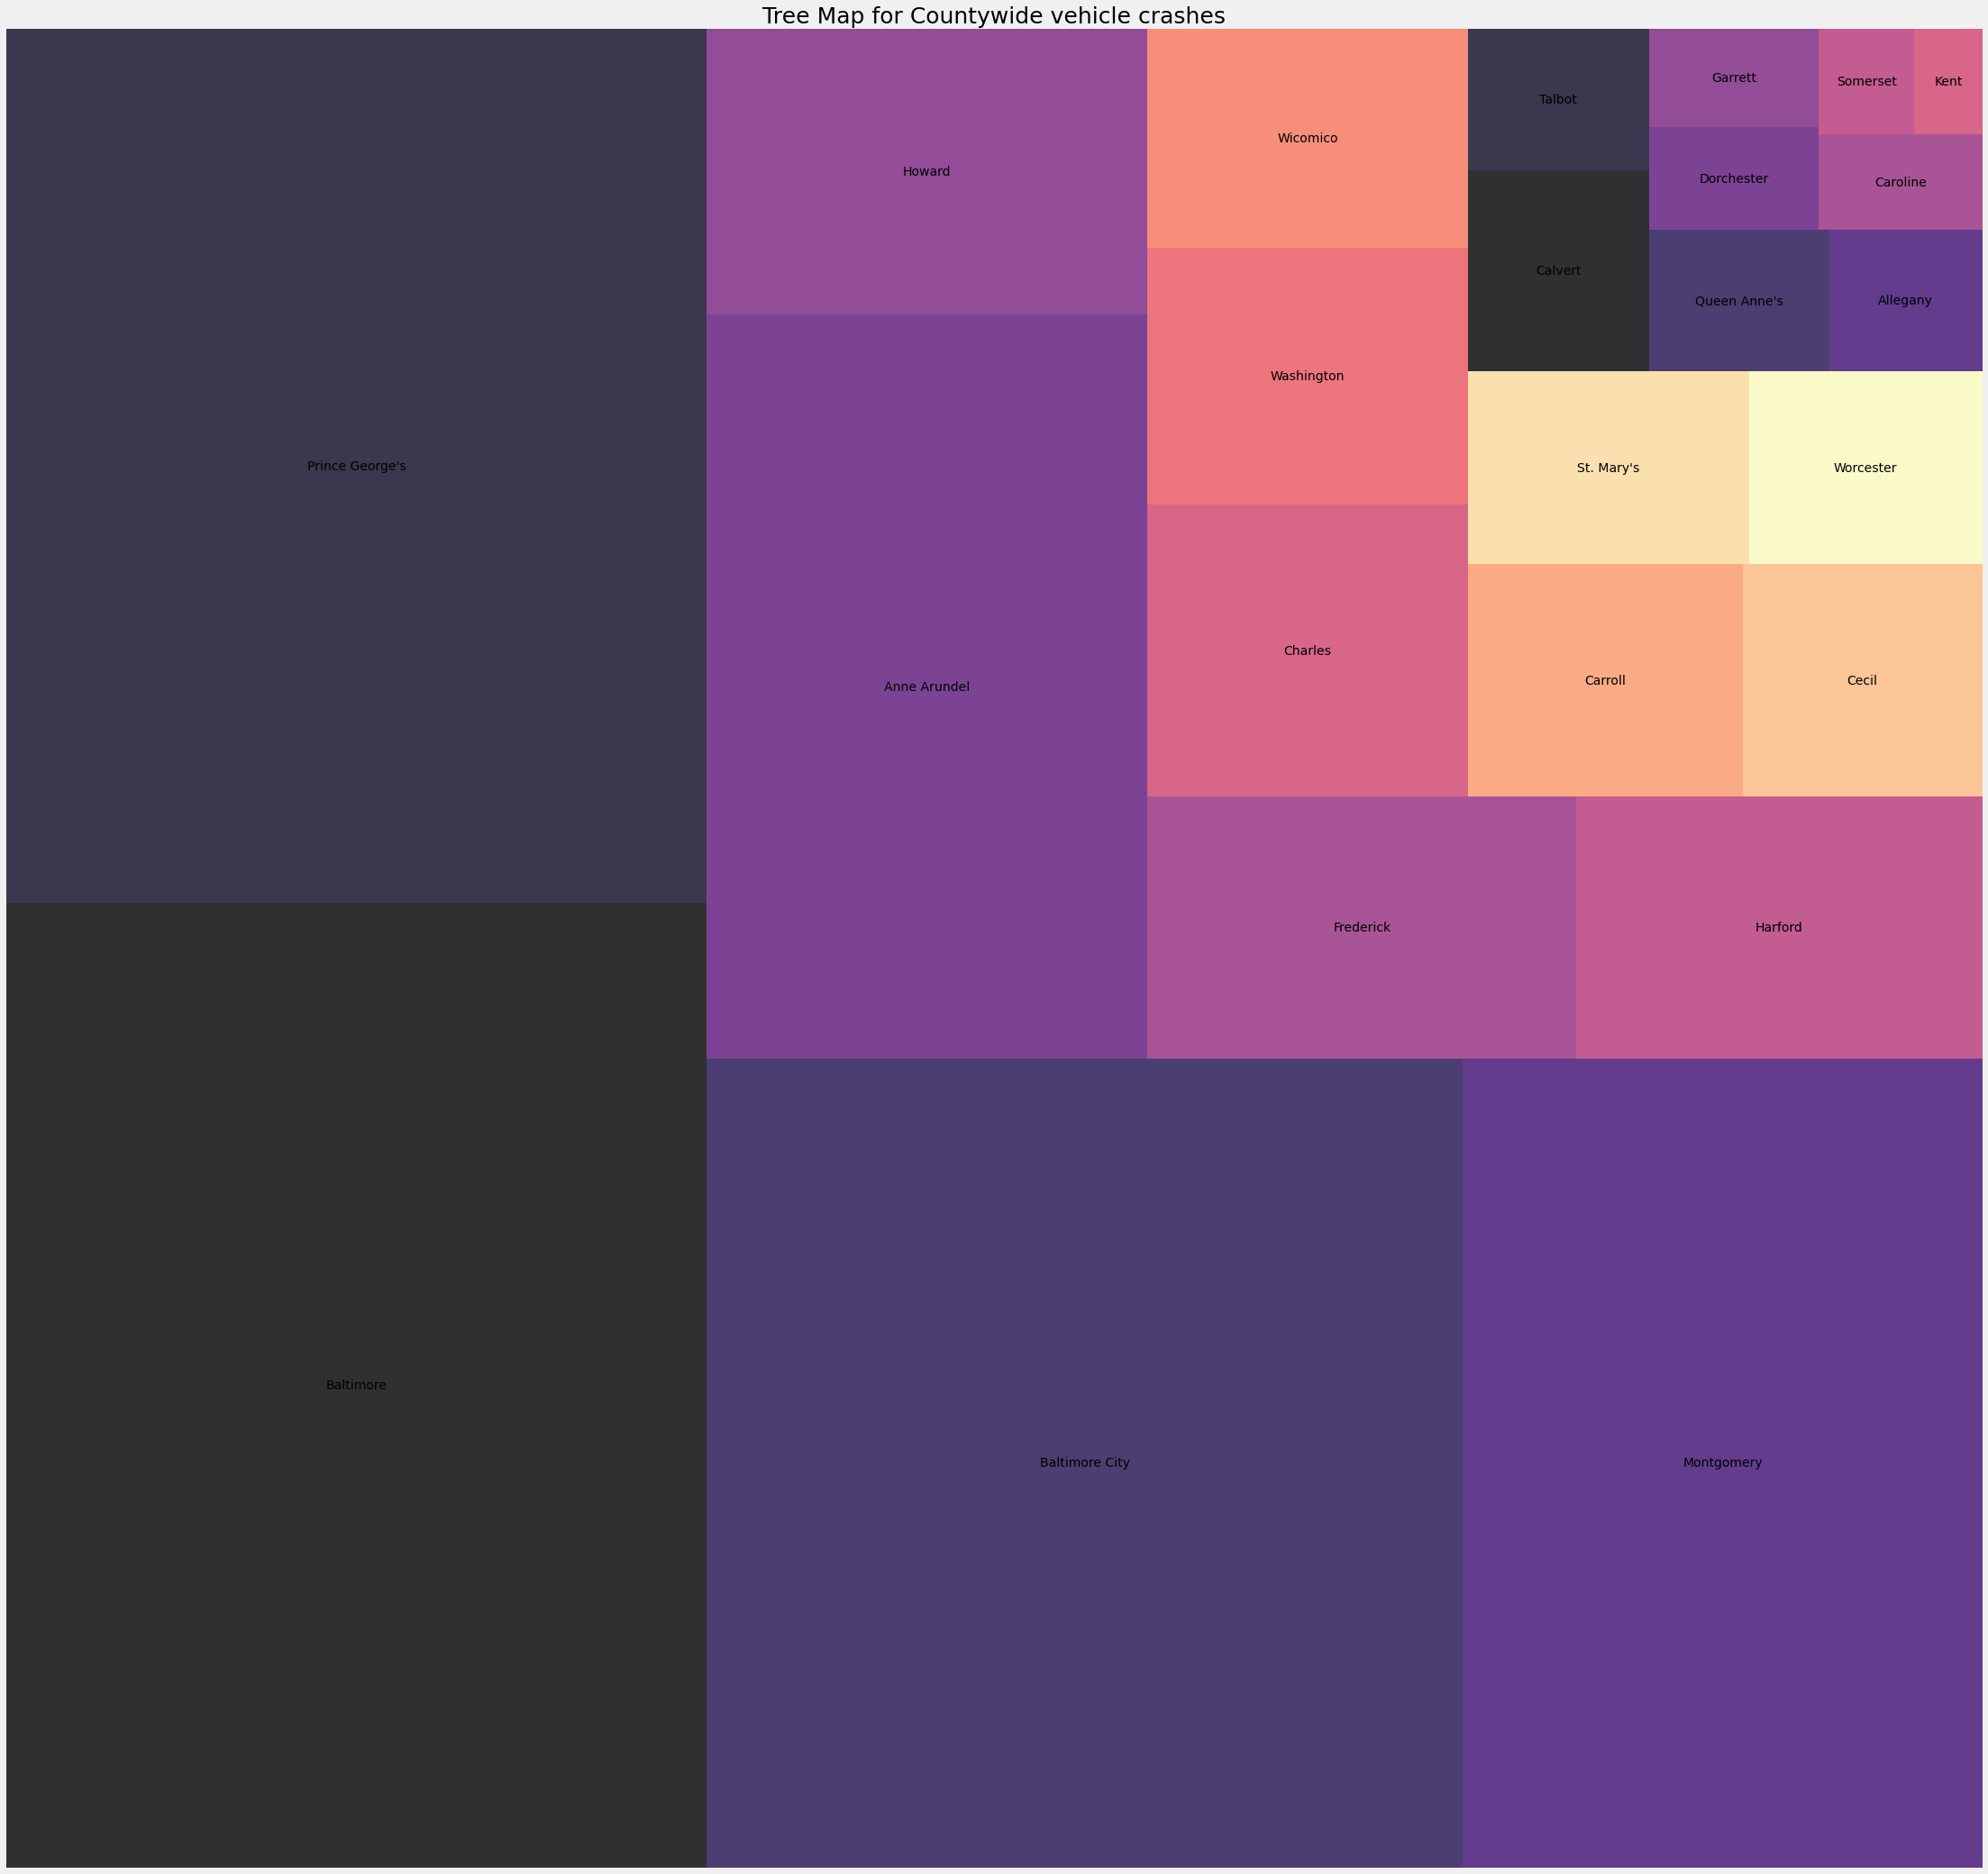

In [25]:
#Plotting a tree map
import numpy as np
!pip install squarify
import squarify
y = df['COUNTY_DESC'].value_counts()
    
plt.rcParams['figure.figsize'] = (35, 35)
plt.style.use('fivethirtyeight')
color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Countywide vehicle crashes', fontsize = 25)
plt.axis('off')
plt.show()

In the above tree map we can clearly see that batimore, Baltimore city, Montgomery, Prince George has more crashes in the past.

# Representation of correlation using heatmap

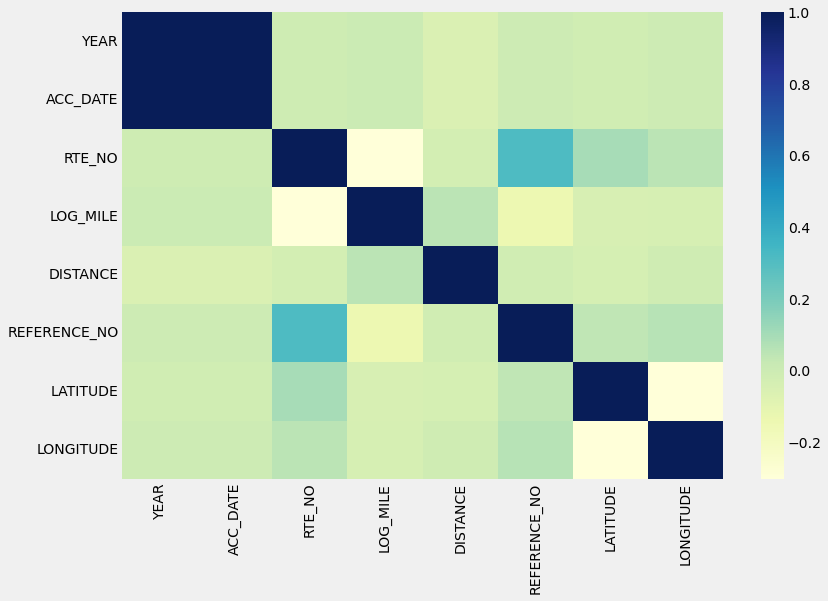

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="YlGnBu");